In [1]:
import pandas as pd
import os
from IPython.display import display

covid_data = pd.read_excel(r"C:\Users\lijitha\datasets\COVID-19-geographic-disbtribution-worldwide-2020-03-20.xlsx")
covid_data.columns
#Index(['DateRep', 'Day', 'Month', 'Year', 'Cases', 'Deaths','Countries and territories', 'GeoId'],

#Countries effected
covid_countries = covid_data["GeoId"].nunique()
print("Countries effected:"+ str(covid_countries))

#Covid data worldwide
covid_ww = covid_data.groupby("GeoId",as_index=False).agg({
    "Cases":sum,
    "Deaths":sum,
})
print("COVID DATA worldwide:")
display(covid_ww.sort_values("Deaths",ascending=False))
covid_ww.pivot(index="GeoId",columns="Deaths")

#Highestdeathscountrywise
Highestdeathscountrywise=covid_data[["GeoId","Year","Deaths"]].groupby(["GeoId"],as_index=False)['Deaths'].sum()
print("Country with highest COVID Deaths:\n")
display(Highestdeathscountrywise.sort_values("Deaths",ascending=False).head(1))

#DeathscountryYearwise
HighestdeathscountryYearwise=covid_data[["GeoId","Year","Deaths"]].groupby(["Year","GeoId"],as_index=False)["Deaths"].sum()
print("COVID Deaths year and country wise :")
#print(HighestdeathscountryYearwise)
HighestdeathscountryYearwise=HighestdeathscountryYearwise[HighestdeathscountryYearwise.GeoId.str.strip()=='CN']
display(HighestdeathscountryYearwise)

#DeathsInIndia
DeathsInIndia=covid_data[["GeoId","Year","Deaths"]].groupby(["Year","GeoId"],as_index=False)["Deaths"].sum()
DeathsInIndia=DeathsInIndia[DeathsInIndia.GeoId.str.strip()=='IN']
print("Deaths in India")
display(DeathsInIndia)

#YearlyDeathsCountryWise
YearlyDeaths=covid_data.groupby("Year",as_index=False)["Deaths"].sum()
print("Yearly deaths Countrywisedue to COVID:\n")
display(YearlyDeaths)


#DeathFirstCaseDate
DeathFirstCaseDate=covid_data[covid_data.GeoId.str.strip()=='IN']
#display(DeathFirstCaseDate)
DeathFirstCaseDate=DeathFirstCaseDate[["DateRep","GeoId","Cases"]].agg({"DateRep":min})
print("Firs Case Detected Date in India")
display(DeathFirstCaseDate)


Countries effected:166
COVID DATA worldwide:


,GeoId,Cases,Deaths
78,IT,41035,3407
34,CN,81337,3254
76,IR,18407,1284
49,ES,17147,767
54,FR,10995,372
...,...,...,...
59,GI,10,0
58,GH,11,0
57,GG,1,0
56,GE,40,0


Country with highest COVID Deaths:



,GeoId,Deaths
78,IT,3407


COVID Deaths year and country wise :


,Year,GeoId,Deaths
12,2019,CN,0
101,2020,CN,3254


Deaths in India


,Year,GeoId,Deaths
30,2019,IN,0
141,2020,IN,4


Yearly deaths Countrywisedue to COVID:



,Year,Deaths
0,2019,0
1,2020,9885


Firs Case Detected Date in India


DateRep   2019-12-31
dtype: datetime64[ns]

COVID DATA worldwide:


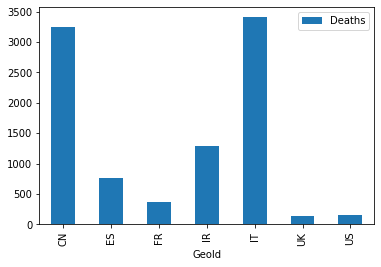

In [194]:
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt


#Covid data worldwide
covid_ww = covid_data.groupby(["GeoId"],as_index=False).agg({
    "Cases":sum,
    "Deaths":sum
})
print("COVID DATA worldwide:")
#display(covid_ww.sort_values("Deaths",ascending=False))
#covid_ww.pivot(index="GeoId",columns="Deaths")
covid_ww=covid_ww[covid_ww["Deaths"]>100]
covid_ww.plot(x ='GeoId', y='Deaths', kind = 'bar')
plt.show()

In [5]:

import pandas as pd
import os
from IPython.display import display


covid_data = pd.read_excel(r"C:\Users\lijitha\datasets\COVID-19-geographic-disbtribution-worldwide-2020-03-20.xlsx")
type(covid_data)

pandas.core.frame.DataFrame